/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:861: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


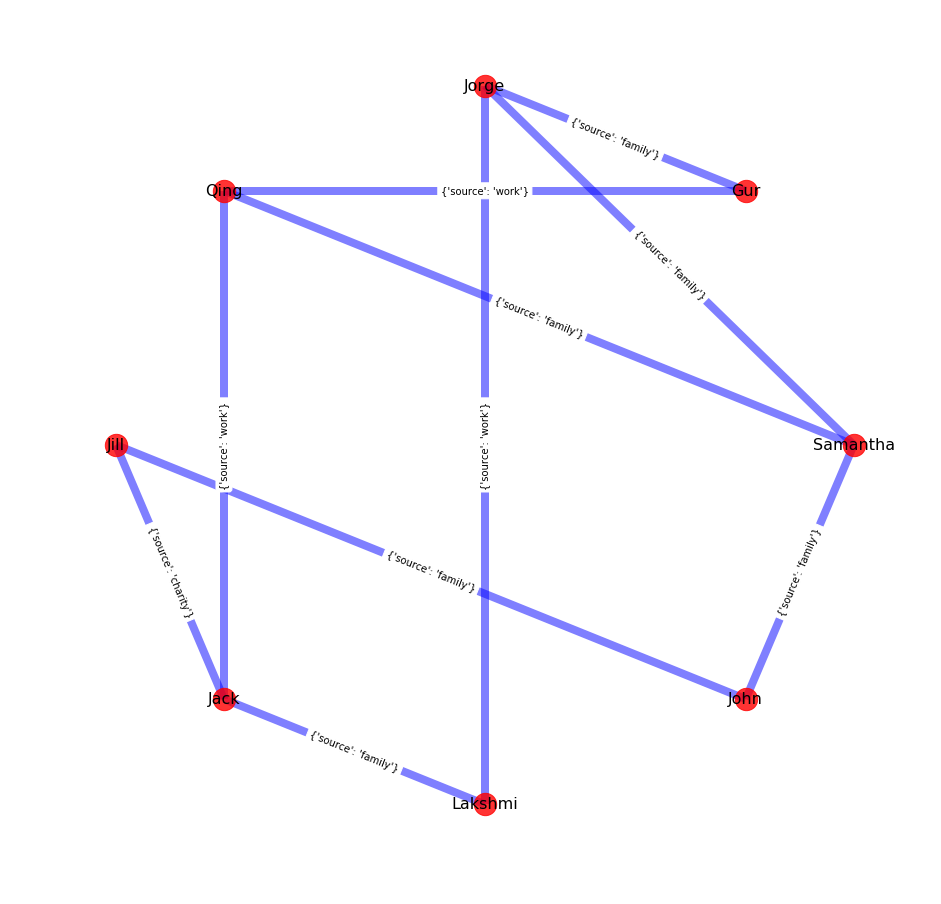

In [1]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
G = nx.Graph()
nodes = ["Gur","Qing","Samantha","Jorge","Lakshmi","Jack","John","Jill"]
edges = [("Gur","Qing",{"source":"work"}),
         ("Gur","Jorge", {"source":"family"}),
        ("Samantha","Qing", {"source":"family"}),
        ("Jack","Qing", {"source":"work"}),
        ("Jorge","Lakshmi", {"source":"work"}),
        ("Jorge","Samantha",{"source":"family"}),
        ("Samantha","John", {"source":"family"}),
        ("Lakshmi","Jack", {"source":"family"}),
        ("Jack","Jill", {"source":"charity"}),
        ("Jill","John",{"source":"family"})]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

#pos = nx.spring_layout(G)  # positions for all nodes
pos = nx.circular_layout(G)  # positions for all nodes
# Let's draw a big graph so that it is clearer
fig = plt.figure(1, figsize=(16, 16))

# nodes
nx.draw_networkx_nodes(G, pos,
                       node_color='r',
                       node_size=500,
                       alpha=0.8)

# edges
#nx.draw_networkx_edges(sub_graph,pos,width=8.0,alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=8, alpha=0.5, edge_color='b')

nx.draw_networkx_edge_labels(G, pos, font_size=10)


node_name = {}
for node in G.nodes():
    node_name[node] = str(node)

       

nx.draw_networkx_labels(G, pos, node_name, font_size=16)


plt.axis('off')
plt.show()  # display

In [2]:



def get_connections(graph,node,relationship):
    if relationship not in {'charity', 'work', 'family'}:
        return None

    relation_net = nx.Graph([(u,v,d) for (u,v,d) in G.edges(nbunch = G.nodes(), data = True) if u == node or v == node])
    relation_subnet = nx.Graph([(u,v,d) for (u,v,d) in G.edges(nbunch = relation_net.nodes(), data = True) if d['source']== relationship])
    relation1 = nx.Graph([(u,v,d) for (u,v,d) in G.edges(nbunch = relation_subnet.nodes(), data = True) if d['source'] == relationship])
    relation2 = nx.Graph([(u,v,d) for (u,v,d) in G.edges(nbunch = relation1.nodes(), data = True) if d['source'] == relationship])
    
    
    return list(set(relation2))
                


In [3]:
get_connections(G, 'John', 'family')

['Gur', 'Samantha', 'Jorge', 'Qing', 'Jill', 'John']